# Notebook 7: High Res - Probing Scale Length of Young Stars 

This notebook will be exploring more in depth younger stars in the h329 galaxy at the present day redshift. We will be taking a number of star populations by isolating by age. I took ages less than 9, 6, 5, 3, 2, and 1 Gyr (4 Gyr was calculated in the last notebook). We will also explore how the scale length changes for each and then in the next notebook we will look at the relations between age, metallicity and radius. 

## Setup 

In [1]:
import astropy

import matplotlib.pyplot as plt
import h5py
import pynbody
from pynbody.analysis import profile
from scipy.optimize import curve_fit

from morgans_sim_setup import *
import numpy as np
import pandas as pd

In [2]:
plt.style.use('bmh')

In [3]:
## Pathway to the simulation galaxy data: 

path_to_h329 = '/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004096'
## We are using 4096 present day timestep and simulation data with only gas and star particles

h329, h329_h, h329_h1 = sim_setup(path_to_h329)

loading sim
doing units
selecting halos
making faceon


In [4]:
## Setting up disk filter (walked through in Notebook 2)

radius_d = 30
height_d = 2 ## thickness height is centered on the center defined below
center_d = (0,0,0)
f_disk = pynbody.filt.Disc(radius_d, height_d, center_d)

## We will use this filter for the disk in each of our h329 star particle arrays in which we specify a certain age range

## Filtering for Age

Generic filter classes work like band-pass filters. We are going to filter for stars age less than 9, 6, 3, 2 and 1 Gyr here.

In [20]:
young_9 = pynbody.filt.LowPass('age', '9 Gyr')
young_6 = pynbody.filt.LowPass('age', '6 Gyr')
young_5 = pynbody.filt.LowPass('age', '5 Gyr')
young_3 = pynbody.filt.LowPass('age', '3 Gyr')
young_2 = pynbody.filt.LowPass('age', '2 Gyr')
young_1 = pynbody.filt.LowPass('age', '1 Gyr')

Now we have to combine this filter with our previous disk filter to get h329 filtered by star age.

In [21]:
h329_s_9 = h329.s[f_disk & young_9] ## all stars created in the last 9 Gyr

h329_s_6 = h329.s[f_disk & young_6] ## all stars created in the last 6 Gyr

h329_s_5 = h329.s[f_disk & young_5] ## all stars created in the last 5 Gyr

h329_s_3 = h329.s[f_disk & young_3] ## all stars created in the last 3 Gyr

h329_s_2 = h329.s[f_disk & young_2] ## all stars created in the last 2 Gyr 

h329_s_1 = h329.s[f_disk & young_1] ## all stars created in the last 1 Gyr

Now again we must set up our main profile and vertical profile:

In [22]:
## Now setting up vertical profiles using our filters (created in cell above) on h329 galaxy

## Profiles for stars age less than 9 Gyr
h329_p_s_vert_9 = profile.VerticalProfile(h329_s_9, '5 kpc', '20 kpc', '2 kpc') ## vertical profile
h329_p_s_9 = pynbody.analysis.profile.Profile(h329_s_9, vmin =.01) ## radial profile

## Profiles for stars age less than 6 Gyr
h329_p_s_vert_6 = profile.VerticalProfile(h329_s_6, '5 kpc', '20 kpc', '2 kpc') ## vertical profile
h329_p_s_6 = pynbody.analysis.profile.Profile(h329_s_6, vmin =.01) ## radial profile

## Profiles for stars age less than 5 Gyr
h329_p_s_vert_5 = profile.VerticalProfile(h329_s_5, '5 kpc', '20 kpc', '2 kpc') ## vertical profile
h329_p_s_5 = pynbody.analysis.profile.Profile(h329_s_5, vmin =.01) ## radial profile

## Profiles for stars age less than 3 Gyr
h329_p_s_vert_3 = profile.VerticalProfile(h329_s_3, '5 kpc', '20 kpc', '2 kpc') ## vertical profile
h329_p_s_3 = pynbody.analysis.profile.Profile(h329_s_3, vmin =.01) ## radial profile

## Profiles for stars age less than 2 Gyr
h329_p_s_vert_2 = profile.VerticalProfile(h329_s_2, '5 kpc', '20 kpc', '2 kpc') ## vertical profile
h329_p_s_2 = pynbody.analysis.profile.Profile(h329_s_2, vmin =.01) ## radial profile

## Profiles for stars age less than 1 Gyr
h329_p_s_vert_1 = profile.VerticalProfile(h329_s_1, '5 kpc', '20 kpc', '2 kpc') ## vertical profile
h329_p_s_1 = pynbody.analysis.profile.Profile(h329_s_1, vmin =.01) ## radial profile

## Background Plots

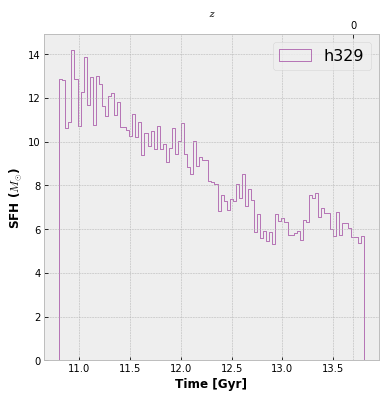

In [24]:
## Young stars that were created in the last 3 Gyr

fig = plt.figure(figsize=[6,6])

pynbody.plot.stars.sfh(h329_s_3,bins=100, color='purple', label = 'h329')
plt.legend(fontsize=16)
plt.xlabel('Time [Gyr]', fontweight='bold')
plt.ylabel(r'SFH ($M_{\odot}$)', fontweight='bold')
plt.tick_params(axis='both', which='major')

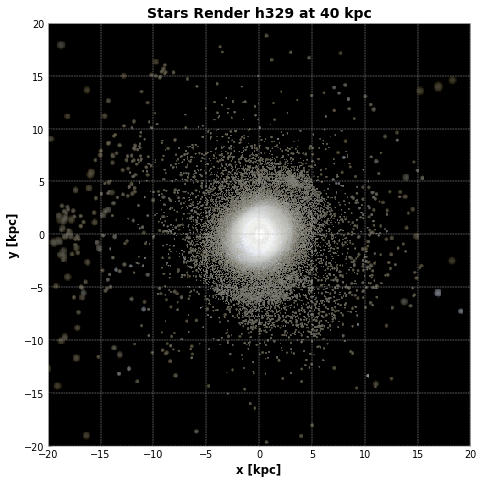

In [12]:
## Stellar render of stars less than 2 Gyr face-on view

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_s_2, width = '40 kpc', dynamic_range = 8) ## using stars less than 2 Gyr old for this image
    ## turning up dynamic_range super high to see more faint areas
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 at 40 kpc', fontweight='bold');

### Stellar Render Side-On Using h329 Disk with Filter

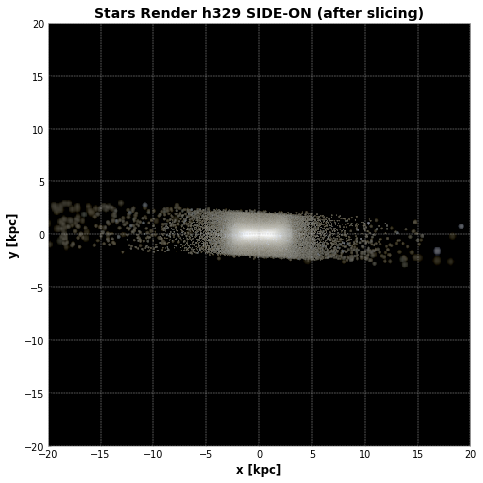

In [14]:
## Stellar render of stars less than 2 Gyr side-on view

pynbody.analysis.angmom.sideon(h329_s_2)

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_s_2, width = '40 kpc', dynamic_range=8) ## also using stars less than 2 Gyr old here too
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 SIDE-ON (after slicing)', fontweight='bold')

pynbody.analysis.angmom.faceon(h329_s_2);

## Profiles

### Radius Versus Stellar Mass: for Stars Less than 9 Gyr

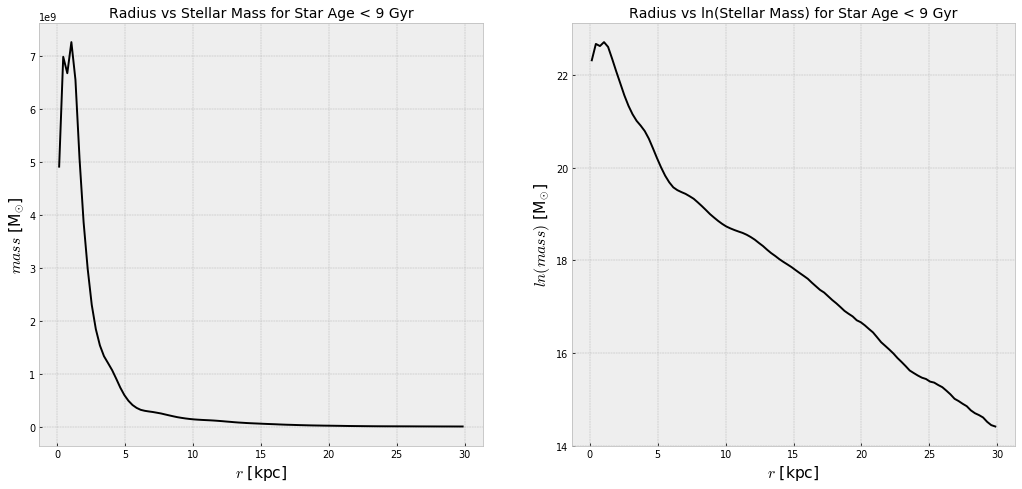

In [8]:
## Radius versus Stellar Mass: exponential and linear side by side comparison

fig, axs = plt.subplots(1, 2, figsize=[18, 8], dpi=70)

axs[0].plot(h329_p_s_9['rbins'].in_units('kpc'), h329_p_s_9['mass'].in_units('Msol'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'$mass$ [M$_{\odot}$]', fontsize=16)
axs[0].set_title('Radius vs Stellar Mass for Star Age < 9 Gyr')

axs[1].plot(h329_p_s_9['rbins'].in_units('kpc'), np.log(h329_p_s_9['mass'].in_units('Msol')),'k') 
## np.log function means natural log!
axs[1].set_xlabel('$r$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
axs[1].set_title('Radius vs ln(Stellar Mass) for Star Age < 9 Gyr');

### Radius Versus Stellar Mass: for Stars Less than 6 Gyr

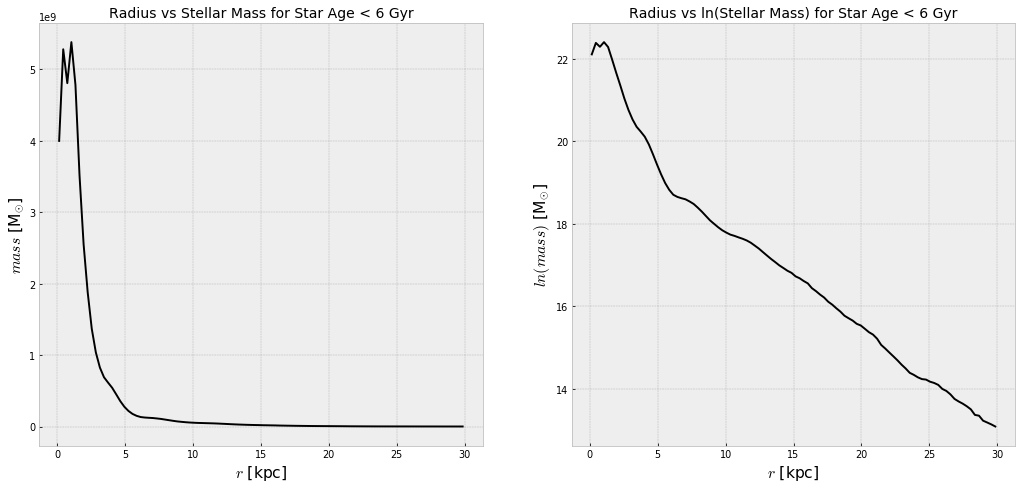

In [9]:
## Radius versus Stellar Mass: exponential and linear side by side comparison

fig, axs = plt.subplots(1, 2, figsize=[18, 8], dpi=70)

axs[0].plot(h329_p_s_6['rbins'].in_units('kpc'), h329_p_s_6['mass'].in_units('Msol'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'$mass$ [M$_{\odot}$]', fontsize=16)
axs[0].set_title('Radius vs Stellar Mass for Star Age < 6 Gyr')

axs[1].plot(h329_p_s_6['rbins'].in_units('kpc'), np.log(h329_p_s_6['mass'].in_units('Msol')),'k') 
## np.log function means natural log!
axs[1].set_xlabel('$r$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
axs[1].set_title('Radius vs ln(Stellar Mass) for Star Age < 6 Gyr');

### Radius Versus Stellar Mass: for Stars Less than 5 Gyr

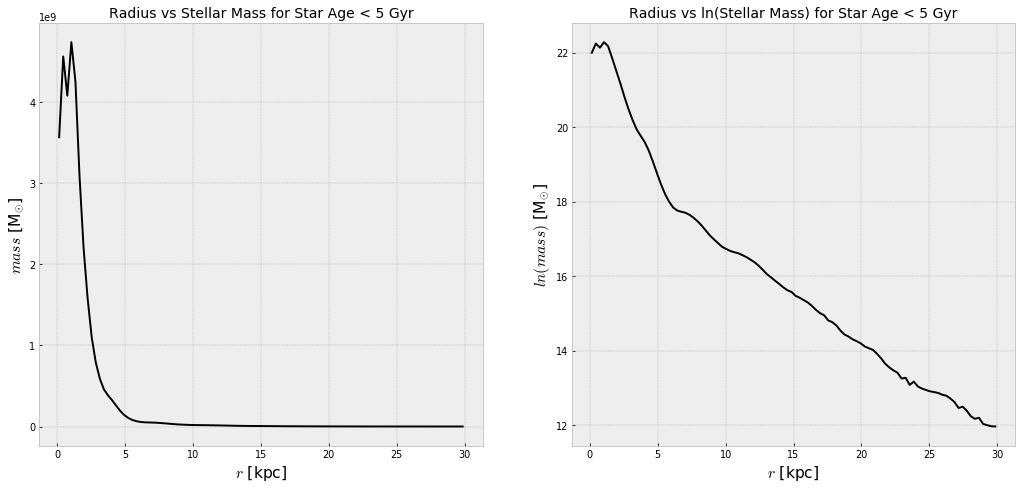

In [23]:
## Radius versus Stellar Mass: exponential and linear side by side comparison

fig, axs = plt.subplots(1, 2, figsize=[18, 8], dpi=70)

axs[0].plot(h329_p_s_5['rbins'].in_units('kpc'), h329_p_s_5['mass'].in_units('Msol'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'$mass$ [M$_{\odot}$]', fontsize=16)
axs[0].set_title('Radius vs Stellar Mass for Star Age < 5 Gyr')

axs[1].plot(h329_p_s_5['rbins'].in_units('kpc'), np.log(h329_p_s_5['mass'].in_units('Msol')),'k') 
## np.log function means natural log!
axs[1].set_xlabel('$r$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
axs[1].set_title('Radius vs ln(Stellar Mass) for Star Age < 5 Gyr');

### Radius Versus Stellar Mass: for Stars Less than 3 Gyr

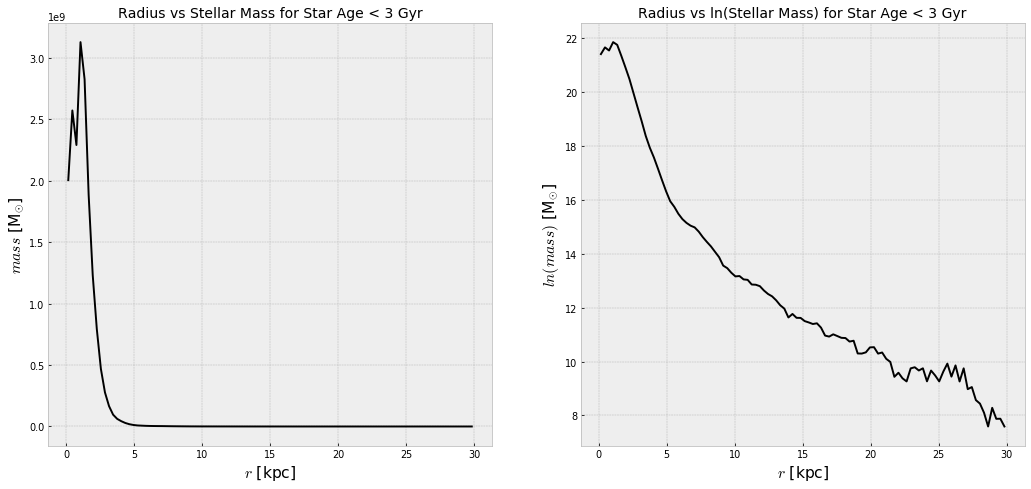

In [12]:
## Radius versus Stellar Mass: exponential and linear side by side comparison

fig, axs = plt.subplots(1, 2, figsize=[18, 8], dpi=70)

axs[0].plot(h329_p_s_3['rbins'].in_units('kpc'), h329_p_s_3['mass'].in_units('Msol'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'$mass$ [M$_{\odot}$]', fontsize=16)
axs[0].set_title('Radius vs Stellar Mass for Star Age < 3 Gyr')

axs[1].plot(h329_p_s_3['rbins'].in_units('kpc'), np.log(h329_p_s_3['mass'].in_units('Msol')),'k') 
## np.log function means natural log!
axs[1].set_xlabel('$r$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
axs[1].set_title('Radius vs ln(Stellar Mass) for Star Age < 3 Gyr');

### Radius Versus Stellar Mass: for Stars Less than 2 Gyr

/opt/apps/intel18/python3/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


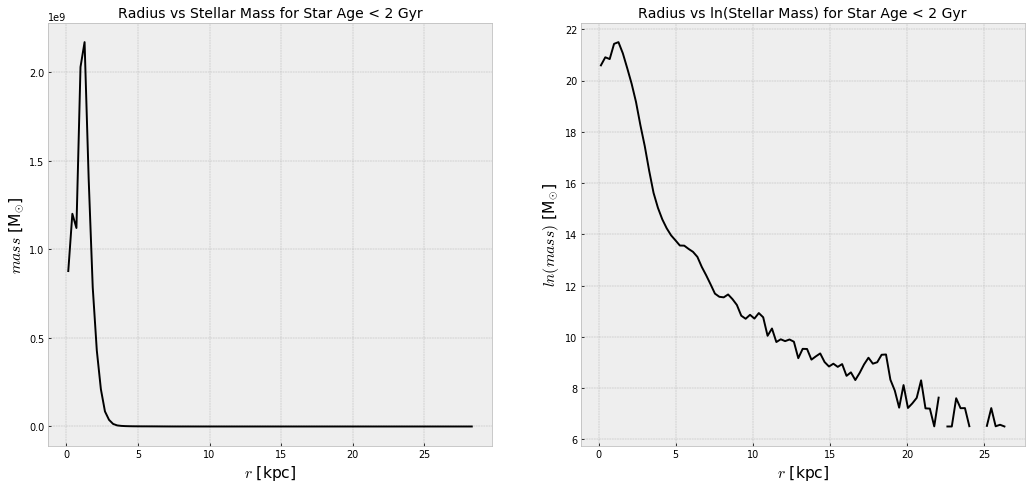

In [48]:
## Radius versus Stellar Mass: exponential and linear side by side comparison

fig, axs = plt.subplots(1, 2, figsize=[18, 8], dpi=70)

axs[0].plot(h329_p_s_2['rbins'].in_units('kpc'), h329_p_s_2['mass'].in_units('Msol'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'$mass$ [M$_{\odot}$]', fontsize=16)
axs[0].set_title('Radius vs Stellar Mass for Star Age < 2 Gyr')

axs[1].plot(h329_p_s_2['rbins'].in_units('kpc'), np.log(h329_p_s_2['mass'].in_units('Msol')),'k') 
## np.log function means natural log!
axs[1].set_xlabel('$r$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
axs[1].set_title('Radius vs ln(Stellar Mass) for Star Age < 2 Gyr');

### Radius Versus Stellar Mass: for Stars Less than 1 Gyr

/opt/apps/intel18/python3/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


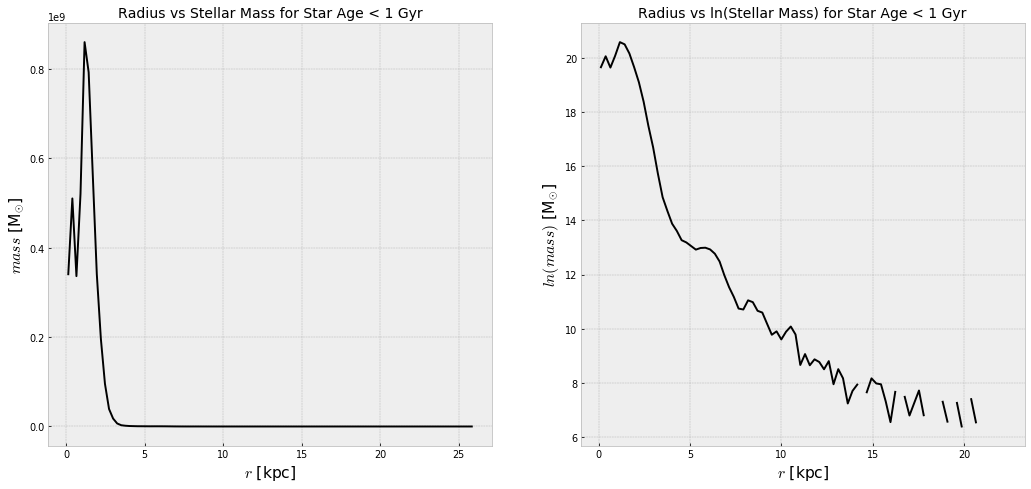

In [38]:
## Radius versus Stellar Mass: exponential and linear side by side comparison

fig, axs = plt.subplots(1, 2, figsize=[18, 8], dpi=70)

axs[0].plot(h329_p_s_1['rbins'].in_units('kpc'), h329_p_s_1['mass'].in_units('Msol'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'$mass$ [M$_{\odot}$]', fontsize=16)
axs[0].set_title('Radius vs Stellar Mass for Star Age < 1 Gyr')

axs[1].plot(h329_p_s_1['rbins'].in_units('kpc'), np.log(h329_p_s_1['mass'].in_units('Msol')),'k') 
## np.log function means natural log!
axs[1].set_xlabel('$r$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
axs[1].set_title('Radius vs ln(Stellar Mass) for Star Age < 1 Gyr');
##axs[1].set_xlim(12, 17);  ## Use this to see the gap between x = 14 and x = 15 kpc

## Best Fits

### Best Fit for Radius versus ln(Stellar Mass): Linear Fit

In [10]:
## Defining a linear function
## my_x is the x axis (radius), my_m is the slope, and my_b is the additive constant

def linear(my_x, my_m, my_b):
    y = (my_m*my_x) + my_b
    return y

In [24]:
## We decided above that the best section to do a linear fit on would be from 5 to 20 kpc

## We need to specify conditions for each of our h329 star profiles (9 Gyr, 3 Gyr, 2 Gyr, 1 Gyr)
condition_9 = np.logical_and(h329_p_s_9['rbins'].in_units('kpc') > 5, h329_p_s_9['rbins'].in_units('kpc') < 20)
condition_6 = np.logical_and(h329_p_s_6['rbins'].in_units('kpc') > 5, h329_p_s_6['rbins'].in_units('kpc') < 20)
condition_5 = np.logical_and(h329_p_s_5['rbins'].in_units('kpc') > 5, h329_p_s_5['rbins'].in_units('kpc') < 20)
condition_3 = np.logical_and(h329_p_s_3['rbins'].in_units('kpc') > 5, h329_p_s_3['rbins'].in_units('kpc') < 20)
condition_2 = np.logical_and(h329_p_s_2['rbins'].in_units('kpc') > 5, h329_p_s_2['rbins'].in_units('kpc') < 20)
condition_1 = np.logical_and(h329_p_s_1['rbins'].in_units('kpc') > 5, h329_p_s_1['rbins'].in_units('kpc') < 14)

## Some of the condition ranges must be shortened. 
## Since there are gaps in the graphs above (ex: in the less than 1 Gyr graph) that will ruin the fits since we will have..
## some masses in the y arrays where a star has stellar mass -inf (where the gaps are)



## Here we must use our condition and apply it to all our star profiles to extract our radius and mass arrays

## Radius and mass array for star age less than 9 Gyr
my_x_rad_9 = np.extract(condition_9, h329_p_s_9['rbins'].in_units('kpc'))
my_y_mass_9 = np.extract(condition_9, np.log(h329_p_s_9['mass'].in_units('Msol')))

## Radius and mass array for star age less than 6 Gyr
my_x_rad_6 = np.extract(condition_6, h329_p_s_6['rbins'].in_units('kpc'))
my_y_mass_6 = np.extract(condition_6, np.log(h329_p_s_6['mass'].in_units('Msol')))

## Radius and mass array for star age less than 6 Gyr
my_x_rad_5 = np.extract(condition_5, h329_p_s_5['rbins'].in_units('kpc'))
my_y_mass_5 = np.extract(condition_5, np.log(h329_p_s_5['mass'].in_units('Msol')))

## Radius and mass array for star age less than 3 Gyr
my_x_rad_3 = np.extract(condition_3, h329_p_s_3['rbins'].in_units('kpc'))
my_y_mass_3 = np.extract(condition_3, np.log(h329_p_s_3['mass'].in_units('Msol')))

## Radius and mass array for star age less than 2 Gyr
my_x_rad_2 = np.extract(condition_2, h329_p_s_2['rbins'].in_units('kpc'))
my_y_mass_2 = np.extract(condition_2, np.log(h329_p_s_2['mass'].in_units('Msol')))

## Radius and mass array for star age less than 1 Gyr
my_x_rad_1 = np.extract(condition_1, h329_p_s_1['rbins'].in_units('kpc'))
my_y_mass_1 = np.extract(condition_1, np.log(h329_p_s_1['mass'].in_units('Msol')))

/opt/apps/intel18/python3/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
/opt/apps/intel18/python3/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


In [25]:
## I am using curve_fit function and defining the fit parameters


## Curve fit for star age less than 9 Gyr
fitpars_lin_9, error_lin_9 = curve_fit(linear, my_x_rad_9, my_y_mass_9) ## arrays defined above

## Curve fit for star age less than 6 Gyr
fitpars_lin_6, error_lin_6 = curve_fit(linear, my_x_rad_6, my_y_mass_6) ## arrays defined above

## Curve fit for star age less than 5 Gyr
fitpars_lin_5, error_lin_5 = curve_fit(linear, my_x_rad_5, my_y_mass_5) ## arrays defined above

## Curve fit for star age less than 3 Gyr
fitpars_lin_3, error_lin_3 = curve_fit(linear, my_x_rad_3, my_y_mass_3) ## arrays defined above

## Curve fit for star age less than 2 Gyr
fitpars_lin_2, error_lin_2 = curve_fit(linear, my_x_rad_2, my_y_mass_2)

## Curve fit for star age less than 1 Gyr
fitpars_lin_1, error_lin_1 = curve_fit(linear, my_x_rad_1, my_y_mass_1)


## fitpars_lin returns our fit variables as (m, b) or (slope, additive constant)
fitpars_lin_9, fitpars_lin_6, fitpars_lin_5, fitpars_lin_3, fitpars_lin_2, fitpars_lin_1

(array([-0.21159803, 20.94133954]),
 array([-0.23418244, 20.23673439]),
 array([-0.27161866, 19.58739604]),
 array([-0.37056881, 17.29139642]),
 array([-0.3602742 , 14.63357618]),
 array([-0.65046719, 16.44239307]))

### Best Fit Line for Stars < 9 Gyr

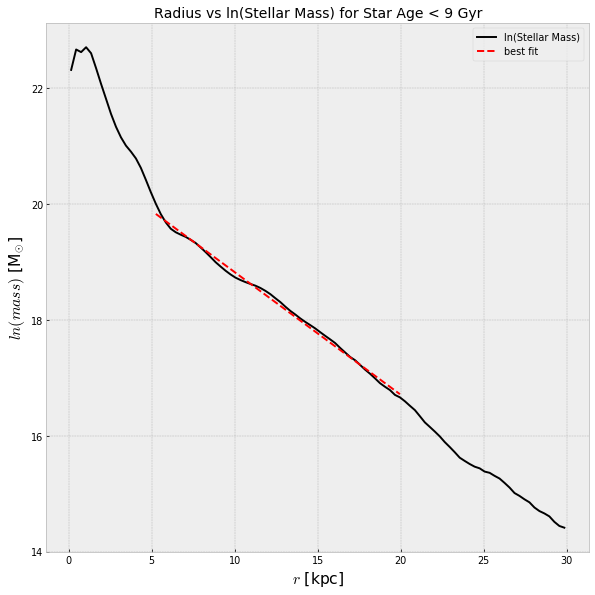

In [16]:
## Let's see the best fit line!

## Graph our original radius versus ln(stellar mass) and add in the fit line calculated above

fig, axs = plt.subplots(figsize=[10, 10], dpi=70)

plt.plot(h329_p_s_9['rbins'].in_units('kpc'), np.log(h329_p_s_9['mass'].in_units('Msol')),'k', label='ln(Stellar Mass)') 
plt.plot(my_x_rad_9, linear(my_x_rad_9, *fitpars_lin_9), linestyle='--', color='r', label='best fit')
    ## Must use my_x_rad that was created for each profile
plt.xlabel('$r$ [kpc]', fontsize=16)
plt.ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
plt.title('Radius vs ln(Stellar Mass) for Star Age < 9 Gyr')
plt.legend();

In [31]:
## Now we can find the scale length using the fitted line and variables

my_r0_9 = -1 / fitpars_lin_9[0] ##fitpars_lin[0] is the fitted m (slope) value drawn directly from out fitpars output

print(my_r0_9)

4.725941921035678


### Best Fit Line for Stars < 6 Gyr

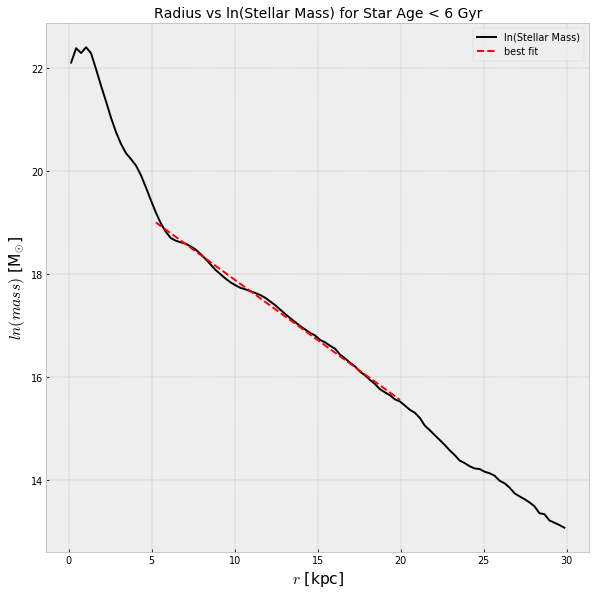

In [14]:
## Let's see the best fit line!

## Graph our original radius versus ln(stellar mass) and add in the fit line calculated above

fig, axs = plt.subplots(figsize=[10, 10], dpi=70)

plt.plot(h329_p_s_6['rbins'].in_units('kpc'), np.log(h329_p_s_6['mass'].in_units('Msol')),'k', label='ln(Stellar Mass)') 
plt.plot(my_x_rad_6, linear(my_x_rad_6, *fitpars_lin_6), linestyle='--', color='r', label='best fit')
    ## Must use my_x_rad that was created for each profile
plt.xlabel('$r$ [kpc]', fontsize=16)
plt.ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
plt.title('Radius vs ln(Stellar Mass) for Star Age < 6 Gyr')
plt.legend();

In [32]:
## Now we can find the scale length using the fitted line and variables

my_r0_6 = -1 / fitpars_lin_6[0] ##fitpars_lin[0] is the fitted m (slope) value drawn directly from out fitpars output

print(my_r0_6)

4.27017501077418


### Best Fit Line for Stars < 5 Gyr

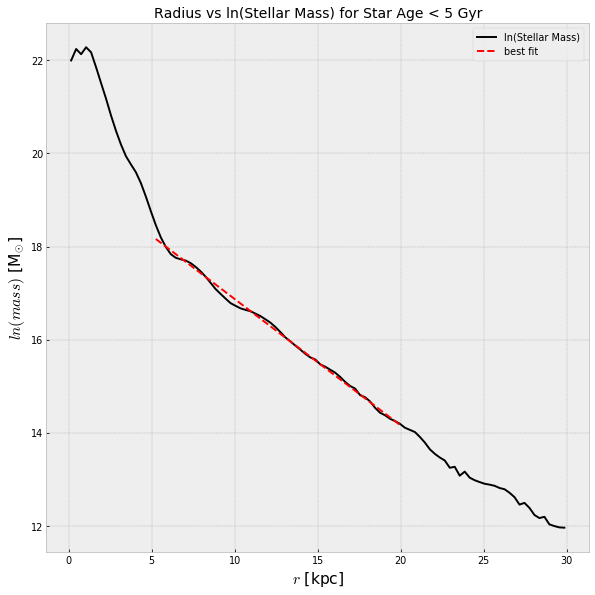

In [26]:
## Let's see the best fit line!

## Graph our original radius versus ln(stellar mass) and add in the fit line calculated above

fig, axs = plt.subplots(figsize=[10, 10], dpi=70)

plt.plot(h329_p_s_5['rbins'].in_units('kpc'), np.log(h329_p_s_5['mass'].in_units('Msol')),'k', label='ln(Stellar Mass)') 
plt.plot(my_x_rad_5, linear(my_x_rad_5, *fitpars_lin_5), linestyle='--', color='r', label='best fit')
    ## Must use my_x_rad that was created for each profile
plt.xlabel('$r$ [kpc]', fontsize=16)
plt.ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
plt.title('Radius vs ln(Stellar Mass) for Star Age < 5 Gyr')
plt.legend();

In [27]:
## Now we can find the scale length using the fitted line and variables

my_r0_5 = -1 / fitpars_lin_5[0] ##fitpars_lin[0] is the fitted m (slope) value drawn directly from out fitpars output

print(my_r0_5)

3.681632191459073


### Best Fit Line for Stars < 3 Gyr

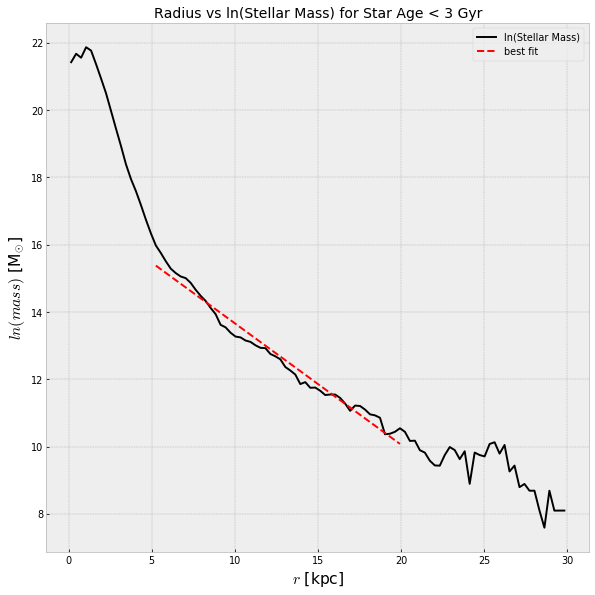

In [55]:
## Let's see the best fit line!

## Graph our original radius versus ln(stellar mass) and add in the fit line calculated above

fig, axs = plt.subplots(figsize=[10, 10], dpi=70)

plt.plot(h329_p_s_3['rbins'].in_units('kpc'), np.log(h329_p_s_3['mass'].in_units('Msol')),'k', label='ln(Stellar Mass)') 
plt.plot(my_x_rad_3, linear(my_x_rad_3, *fitpars_lin_3), linestyle='--', color='r', label='best fit')
    ## Must use my_x_rad that was created for each profile
plt.xlabel('$r$ [kpc]', fontsize=16)
plt.ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
plt.title('Radius vs ln(Stellar Mass) for Star Age < 3 Gyr')
plt.legend();

In [33]:
## Now we can find the scale length using the fitted line and variables

my_r0_3 = -1 / fitpars_lin_3[0] ##fitpars_lin[0] is the fitted m (slope) value drawn directly from out fitpars output

print(my_r0_3)

2.6985541647741673


### Best Fit Line for Stars < 2 Gyr

/opt/apps/intel18/python3/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


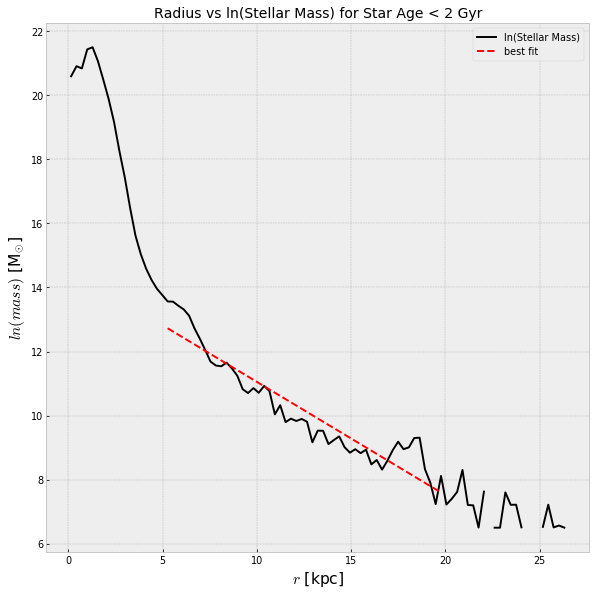

In [57]:
## Let's see the best fit line!

## Graph our original radius versus ln(stellar mass) and add in the fit line calculated above

fig, axs = plt.subplots(figsize=[10, 10], dpi=70)

plt.plot(h329_p_s_2['rbins'].in_units('kpc'), np.log(h329_p_s_2['mass'].in_units('Msol')),'k', label='ln(Stellar Mass)') 
plt.plot(my_x_rad_2, linear(my_x_rad_2, *fitpars_lin_2), linestyle='--', color='r', label='best fit')
    ## Must use my_x_rad that was created for each profile
plt.xlabel('$r$ [kpc]', fontsize=16)
plt.ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
plt.title('Radius vs ln(Stellar Mass) for Star Age < 2 Gyr')
plt.legend();

In [34]:
## Now we can find the scale length using the fitted line and variables

my_r0_2 = -1 / fitpars_lin_2[0] ##fitpars_lin[0] is the fitted m (slope) value drawn directly from out fitpars output

print(my_r0_2)

2.7756636098779843


### Best Fit Line for Stars < 1 Gyr

/opt/apps/intel18/python3/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


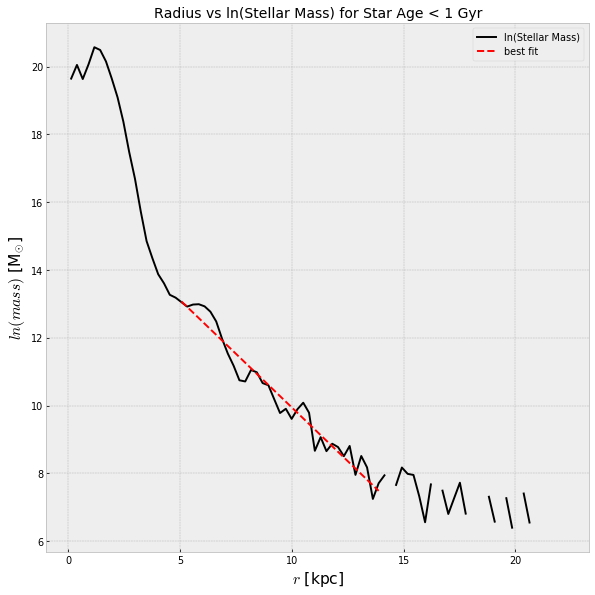

In [59]:
## Let's see the best fit line!

## Graph our original radius versus ln(stellar mass) and add in the fit line calculated above

fig, axs = plt.subplots(figsize=[10, 10], dpi=70)

plt.plot(h329_p_s_1['rbins'].in_units('kpc'), np.log(h329_p_s_1['mass'].in_units('Msol')),'k', label='ln(Stellar Mass)') 
plt.plot(my_x_rad_1, linear(my_x_rad_1, *fitpars_lin_1), linestyle='--', color='r', label='best fit')
    ## Must use my_x_rad that was created for each profile
plt.xlabel('$r$ [kpc]', fontsize=16)
plt.ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
plt.title('Radius vs ln(Stellar Mass) for Star Age < 1 Gyr')
plt.legend();

In [35]:
## Now we can find the scale length using the fitted line and variables

my_r0_1 = -1 / fitpars_lin_1[0] ##fitpars_lin[0] is the fitted m (slope) value drawn directly from out fitpars output

print(my_r0_1)

1.5373565682238286


## Comparisons

In [29]:
## We have some other scale length data from previous notebooks for comparison:

## Star age less than 4 Gyr (notebook 6) gave us a scale length of:

my_r0_4 = 3.055 ## approximately 

## Star age when we did NOT incldue any age filters (so all stars of all ages) - from notebook 4

my_r0_all = 4.929 ## approximately

In [36]:
print(my_r0_all, my_r0_9, my_r0_6, my_r0_5, my_r0_4, my_r0_3, my_r0_2, my_r0_1)

4.929 4.725941921035678 4.27017501077418 3.681632191459073 3.055 2.6985541647741673 2.7756636098779843 1.5373565682238286


I'm not sure how reliable the data from star age less than 2 Gyr and 1 Gyr is because of the gaps in the radius versus stellar mass graphs further out and also since I had to cut the 1 Gyr arrays when doing best fits due to the gaps in data. So that one may be less comparable to the others.

In general though, the scale length of the galaxy decreases as we isolate populations of younger and younger stars (save for the fairly consistent scale length between the 3 and 2 Gyr calculations). This is interesting because we would generally expect scale length to act the oppostite - since older stars would be located near the center of the galaxy, and then as it grows in size with age the newer/younger stars would form at larger distances from the center (on average). 

There are some noticeably larger decreases in scale length between stellar ages less than 6, 5 and 5 Gyr and then again when we go to less than 1 Gyr but that could be the we had to to limit the best fit data. 